#Fast campus EDA 아이데이션 초급5조

##I.작업순서
 1.데이터 분석 문제 정의<br>

 2.베이스라인 선정<br>

 3.데이터 수집 및 정제

 4.탐색적 데이터 분석

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 한글 폰트 사용하기 위한 코드

plt.rc('font', family='AppleGothic')
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [ ]:
#확인
import matplotlib.font_manager as fm
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'NanumBarun' in f.name]

[('NanumBarunGothic',
  '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf'),
 ('NanumBarunGothic', '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df_origin = pd.read_excel('/content/drive/MyDrive/5/팀프로젝트/rawdata.xlsx')
display(df_origin.head(2) )

Mounted at /content/drive


,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaT
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02


In [ ]:
df = df_origin.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105419 entries, 0 to 105418
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      105419 non-null  int64         
 1   customer_id             105416 non-null  float64       
 2   course_id               100212 non-null  float64       
 3   type                    105419 non-null  object        
 4   state                   105419 non-null  object        
 5   course_title            105403 non-null  object        
 6   category_title          105395 non-null  object        
 7   format                  105403 non-null  object        
 8   completed_at            105419 non-null  datetime64[ns]
 9   transaction_amount      105419 non-null  int64         
 10  coupon_title            31817 non-null   object        
 11  coupon_discount_amount  31817 non-null   float64       
 12  sale_price              104291

columns에 대한 설명

id : 아이디 <br>
customer_id : 고객 아이디<br>
course_id : 코스 아이디<br>
type : 고객상태(오더/페이먼트)<br>
- order : 결제 페이지는 갔지만 결제하지 않은 상태
- payment : 최종 결제가 일어난 상태
- refund : 환불
- completed : 결제 완료

state : 고객상태(타입결과:페이)<br>
- deleted : 테이블에서 제거해야하는 상태
- cancelled : 결제가 취소된 상태
- pending : pg사에서 결제 완료가 안된 상태
- complete : pg 처리까지 완료된 상태

course_title : 코스이름<br>
category_title : 강의카테고리<br>
format : 강의 패키지 이름 <br>
completed_at : 결제가 완료된 시각<br>
transaction_amount : 최종 결제 금액<br>
coupon_title : (할인)쿠폰 이름 <br>
coupon_discount_amount : (할인)쿠폰 가격 <br>
sale_price : 할인가격<br>
tax_free_amount :교육비 세액공제 비용 <br>
pg : 결제모듈회사(카카오페이, 토스 등), 공백은 PG사를 의미<br>
method : 결제방법<br>
subcategory_title : 강의 서브 카테고리<br>
marketing_start_at :판매가 시작된 날짜(즉, landing page가 최초로 올라간 시점)  (공란은 무시)<br>

In [ ]:
df['type_state'] = df[['type', 'state']].agg('.'.join, axis=1)
df['type_state'].value_counts()

PAYMENT.COMPLETED        52902
ORDER.CANCELLED          34123
PAYMENT.CANCELLED         7156
ORDER.COMPLETED           6036
REFUND.COMPLETED          3822
PAYMENT.PENDING           1144
PAYMENT.DELETED            217
PAYMENT.REQUESTED           14
TRANSACTION.COMPLETED        3
REFUND.DELETED               2
Name: type_state, dtype: int64

In [ ]:
df.type.unique()

array(['ORDER', 'PAYMENT', 'REFUND', 'TRANSACTION'], dtype=object)

In [ ]:
df.corr()

,id,customer_id,course_id,transaction_amount,coupon_discount_amount,sale_price,tax_free_amount
id,1.000000,0.201490,0.360501,0.026398,0.069284,0.044891,0.036309
customer_id,0.201490,1.000000,0.023889,0.018670,-0.344772,-0.001245,-0.002124
course_id,0.360501,0.023889,1.000000,0.045096,0.015162,0.042551,0.042170
transaction_amount,0.026398,0.018670,0.045096,1.000000,-0.342960,0.954943,0.947017
coupon_discount_amount,0.069284,-0.344772,0.015162,-0.342960,1.000000,0.251692,0.244997
sale_price,0.044891,-0.001245,0.042551,0.954943,0.251692,1.000000,0.988255
tax_free_amount,0.036309,-0.002124,0.042170,0.947017,0.244997,0.988255,1.000000


In [1]:
# sns.set_style('white')
# sns.pairplot(df)
# plt.show()

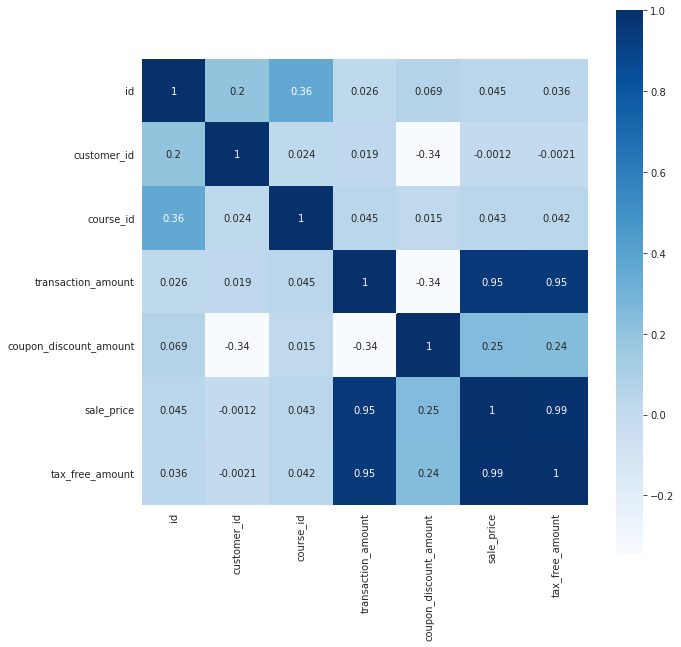

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(), square=True, annot=True, cmap='Blues')
plt.show()

In [ ]:
df['type_state'] = df[['type', 'state']].agg('.'.join, axis=1)
df['type_state'].value_counts()

PAYMENT.COMPLETED        52902
ORDER.CANCELLED          34123
PAYMENT.CANCELLED         7156
ORDER.COMPLETED           6036
REFUND.COMPLETED          3822
PAYMENT.PENDING           1144
PAYMENT.DELETED            217
PAYMENT.REQUESTED           14
TRANSACTION.COMPLETED        3
REFUND.DELETED               2
Name: type_state, dtype: int64

In [ ]:
df_pay_com = df.loc[df.type_state == 'PAYMENT.COMPLETED', :].reset_index(drop=True)
display(df_pay_com.head(2))

df_ref_com = df.loc[df.type_state == 'REFUND.COMPLETED', :].reset_index(drop=True)
display(df_ref_com.head(2))

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at,type_state
0,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04,PAYMENT.COMPLETED
1,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14,PAYMENT.COMPLETED


,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at,type_state
0,972377,444760.0,204122.0,REFUND,COMPLETED,퍼포먼스 마케터 되기 온라인 완주반 2기,마케팅,온라인 완주반,2021-03-29 09:24:43,-147000,NaN,NaN,404000.0,404000.0,NaN,VBANK,NaN,NaT,REFUND.COMPLETED
1,972381,472666.0,203178.0,REFUND,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-29 09:26:13,-96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02,REFUND.COMPLETED


### 카테고리별 전체, B2B, B2C 나누어 데이터 분석

<카테고리별>

카테고리별 [‘category_title’], [‘type’], [‘state’] / 전체, B2B, B2C 별 데이터 분석

- 전체, B2B, B2C 별 선호도(구매 확정 중 많은 비율을 차지하는 카테고리 Top 3)

- 전체, B2B, B2C 별 가격 평균 or 중앙값(이상치 여부에 따라 판단) 

- 전체, B2B, B2C 별 매출(구매 확정 금액 - 환불 확정 금액) 

- 전체, B2B, B2C별 마케팅 시작(marketing_start_at, completed_at)에 따라 기간별 카테고리 매출

type = payment & state = completed (구매 확정)

type = refund & state = completed (환불 확정) 

-> 선호도, 가격 평균(or 중앙값), 매출을 통해 카테고리에 따른 B2B, B2C별 마케팅 방향성 제시


In [ ]:
df_pay_com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52902 entries, 0 to 52901
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      52902 non-null  int64         
 1   customer_id             52902 non-null  float64       
 2   course_id               50922 non-null  float64       
 3   type                    52902 non-null  object        
 4   state                   52902 non-null  object        
 5   course_title            52901 non-null  object        
 6   category_title          52899 non-null  object        
 7   format                  52901 non-null  object        
 8   completed_at            52902 non-null  datetime64[ns]
 9   transaction_amount      52902 non-null  int64         
 10  coupon_title            23761 non-null  object        
 11  coupon_discount_amount  23761 non-null  float64       
 12  sale_price              51833 non-null  float6

카테고리 columns인 경우의 결측치를 전처리 하겠습니다.

In [ ]:
# category_title 전처리

print('category_title 결측치 수:',df_pay_com.category_title.isna().sum(), '개')

# category_title이 null인 3개 row 제거
df_pay_com = df_pay_com.dropna(subset=['category_title'])
print('category_title 결측치 수:',df_pay_com.category_title.isna().sum(), '개')

category_title 결측치 수: 3 개
category_title 결측치 수: 0 개


In [ ]:
df_pay_com.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52899 entries, 0 to 52901
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      52899 non-null  int64         
 1   customer_id             52899 non-null  float64       
 2   course_id               50922 non-null  float64       
 3   type                    52899 non-null  object        
 4   state                   52899 non-null  object        
 5   course_title            52899 non-null  object        
 6   category_title          52899 non-null  object        
 7   format                  52899 non-null  object        
 8   completed_at            52899 non-null  datetime64[ns]
 9   transaction_amount      52899 non-null  int64         
 10  coupon_title            23761 non-null  object        
 11  coupon_discount_amount  23761 non-null  float64       
 12  sale_price              51831 non-null  float6

In [ ]:
# 데이터사이언스와 데이터 사이언스를 '데이터사이언스'로 합쳐줍니다.
df_pay_com.category_title.value_counts()

프로그래밍       17608
데이터사이언스      6899
업무 생산성       6623
디자인          5715
영상/3D        5153
마케팅          4712
부동산/금융       2864
투자/재테크       1490
교육            927
크리에이티브        840
지식콘텐츠          23
비즈니스           22
파이낸스           17
데이터 사이언스        5
관리              1
Name: category_title, dtype: int64

In [ ]:
df_pay_com2 = df_pay_com.replace(to_replace='데이터 사이언스', value='데이터사이언스')
df_pay_com2.category_title.value_counts()
# 데이터 사이언스가 데이터사이언스로 합쳐진 것을 확인했습니다.

프로그래밍      17608
데이터사이언스     6904
업무 생산성      6623
디자인         5715
영상/3D       5153
마케팅         4712
부동산/금융      2864
투자/재테크      1490
교육           927
크리에이티브       840
지식콘텐츠         23
비즈니스          22
파이낸스          17
관리             1
Name: category_title, dtype: int64

결제된 내역 중 카테고리별 분석을 위한 데이터 전처리 과정이 끝났습니다.

전체, B2B(기업 고객)인 경우와 B2C(개인 결제 고객)인 경우를 나눠서<br><br>


구매 확정(payment-completed)
- 카테고리별 선호도, 가격 평균(or 중앙값)에 대해 데이터 분석

환불 확정(refund-completed)
- 카테고리별 비선호도, 가격 평균(or 중앙값)에 대해 데이터 분석

구매 확정 - 환불 확정
- 카테고리별 매출에 대해 데이터 분석

In [ ]:
# 최종 결제 완료인 경우 중 기업고객(B2B)인 경우
df_pc_b2b = df_pay_com2.loc[df_pay_com2.course_title.str.contains('B2B'), :].reset_index(drop=True)
display(df_pc_b2b.head(2))

# 최종 결제 완료인 경우 중 개인고객(B2C)인 경우
df_pc_b2c = df_pay_com2.loc[~df_pay_com2.course_title.str.contains('B2B'), :].reset_index(drop=True)
display(df_pc_b2c.head(2))

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,...,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at,type_state,marketing_effect_month,marketing_term_effect
0,972364,478743.00,204039.00,PAYMENT,COMPLETED,(B2B) 힐코코리아 온라인 구독 올 플랜 - 패파입주사,교육,B2B 온라인,2021-03-29 08:52:36,100000,...,NaN,NaN,NaN,NaN,TRANSFER,NaN,2019-02-19,PAYMENT.COMPLETED,25.63,~30month
1,972365,478745.00,203352.00,PAYMENT,COMPLETED,(B2B) 주식회사 루나 온라인 구독 ALL PLAN - 패파입주사,교육,B2B 온라인,2021-03-29 08:57:12,750000,...,NaN,NaN,NaN,NaN,TRANSFER,NaN,2019-02-19,PAYMENT.COMPLETED,25.63,~30month


,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,...,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at,type_state,marketing_effect_month,marketing_term_effect
0,970657,72297.00,204246.00,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,...,19090.00,190900.00,190900.00,NaN,CARD,NaN,2021-03-04,PAYMENT.COMPLETED,0.80,~6month
1,970658,478028.00,201797.00,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,...,20000.00,117500.00,117500.00,NaN,CARD,PPT/보고서,2019-11-14,PAYMENT.COMPLETED,16.67,~18month


최종 결제 완료 된 카테고리별 비율, 가격 평균(or 중앙값)에 대해 알아보자

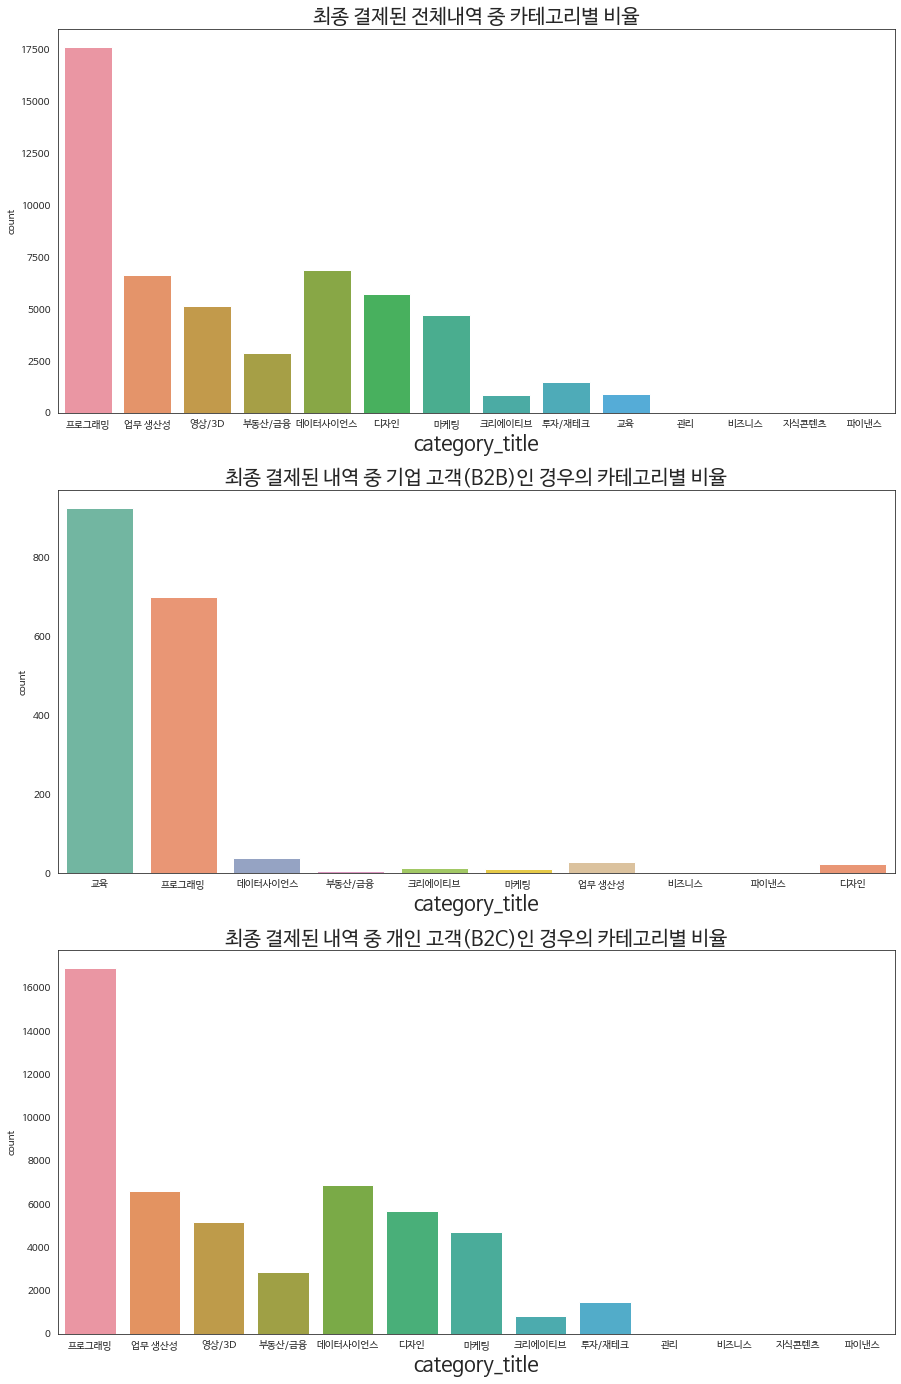

In [ ]:
# 카테고리별 선호도

plt.figure(figsize=(15,24))

plt.subplot(3,1,1)
sns.countplot(data=df_pay_com2, x='category_title')
plt.title('최종 결제된 전체내역 중 카테고리별 비율', fontsize = 20)
plt.xlabel('category_title', fontsize=20)

plt.subplot(3,1,2)
sns.countplot(data=df_pc_b2b, x='category_title', palette = 'Set2')
plt.title('최종 결제된 내역 중 기업 고객(B2B)인 경우의 카테고리별 비율', fontsize = 20)
plt.xlabel('category_title', fontsize=20)

plt.subplot(3,1,3)
sns.countplot(data=df_pc_b2c, x='category_title')
plt.title('최종 결제된 내역 중 개인 고객(B2C)인 경우의 카테고리별 비율', fontsize = 20)
plt.xlabel('category_title', fontsize=20)

plt.show()

최종 결제된 전체 데이터의 강의 카테고리별 비율<br>
1위 프로그래밍<br>
2위 데이터사이언스<br>
3위 업무생산성<br>
가장 비선호 강좌는 관리, 파이낸스, 비즈니스 순입니다.<br><br> 

최종 결제된 내역 중 기업 고객(B2B)인 경우 강의 카테고리별 비율<br>
1위 교육<br>
2위 프로그래밍<br>
3위 데이터사이언스<br>
가장 비선호 강좌는 파이낸스, 비즈니스, 부동산/금융 순입니다.<br><br> 


최종 결제된 내역 중 개인 고객(B2C)인 경우 강의 카테고리별 비율<br>
1위 프로그래밍<br>
2위 데이터사이언스<br>
3위 업무생산성<br>
가장 비선호 강좌는 관리, 파이낸스, 비즈니스 순입니다.<br><br><br>

따라서 전반적으로 선호 강좌는 프로그래밍, 데이터사이언스이고, <br> 비선호 강좌는 관리, 파이낸스, 비즈니스 입니다.<br><br>

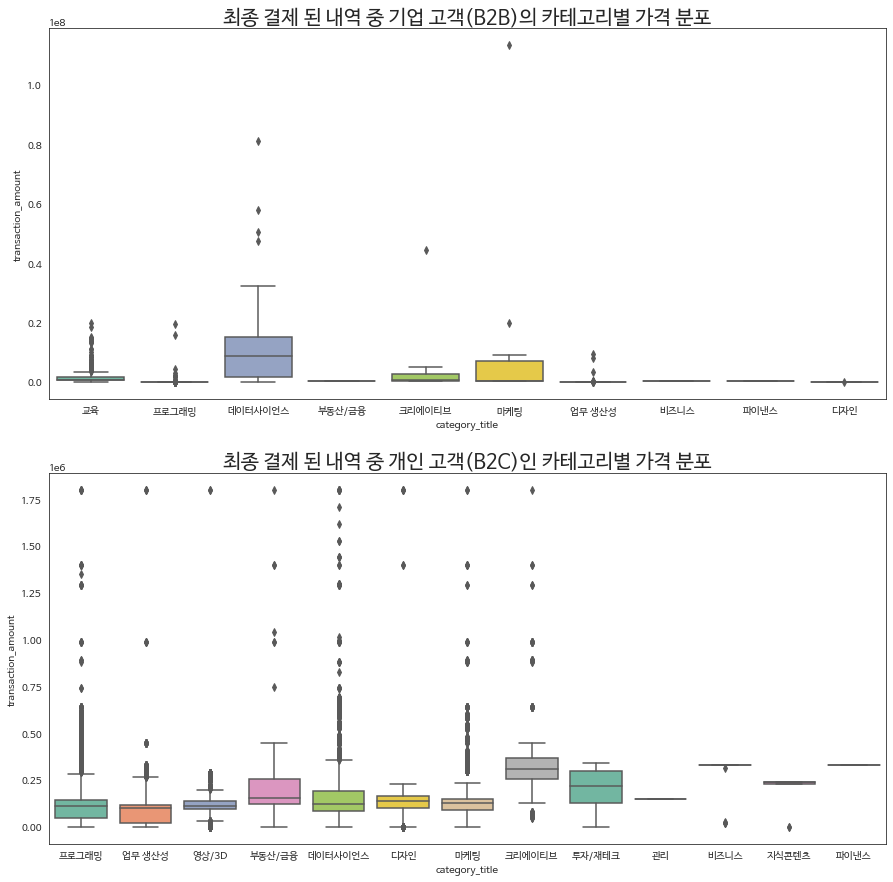

In [ ]:
# 카테고리별 가격 평균을 볼지 중앙값을 볼지 확정하기 위해 우선 이상치부터 확인해보겠습니다.

plt.figure(figsize=(15,15))

plt.subplot(2,1,1)
sns.boxplot(data=df_pc_b2b, x='category_title', y='transaction_amount', palette='Set2')
# plt.ylim([0,1e7])
plt.title('최종 결제 된 내역 중 기업 고객(B2B)의 카테고리별 가격 분포', fontsize=20)

plt.subplot(2,1,2)
sns.boxplot(data=df_pc_b2c, x='category_title', y='transaction_amount', palette='Set2')
plt.title('최종 결제 된 내역 중 개인 고객(B2C)인 카테고리별 가격 분포', fontsize=20)

plt.show()

# 개인고객(B2C)의 이상치가 많아서 가격 평균이 아닌 중앙값을 비교해보겠습니다.

In [ ]:
# B2B에서 가장 높은 가격인 마케팅 category_title의 이상치를 확인해보겠습니다.
df_pay_com2.loc[df_pay_com2.category_title == '마케팅', :]['transaction_amount'].idxmax()
a = df_pay_com2.iloc[9847]['transaction_amount']
print(f'B2B에서 가장 높은 가격을 지불한 경우의 금액은 {a}원 입니다.')

B2B에서 가장 높은 가격을 지불한 경우의 금액은 113400000원 입니다.


In [ ]:
df_pay_com2_medi = df_pay_com2.groupby('category_title').agg({'transaction_amount' : np.median}) # 전체 고객 카테고리별 가격 중앙값
df_b2b_medi = df_pc_b2b.groupby('category_title').agg({'transaction_amount' : np.median}) # 기업 고객 카테고리별 가격 중앙값 
df_b2c_medi = df_pc_b2c.groupby('category_title').agg({'transaction_amount' : np.median}) # 개인 고객 카테고리별 가격 중앙값
df_b2b_medi

,transaction_amount
category_title,
교육,600000.00
데이터사이언스,8700000.00
디자인,144000.00
마케팅,480000.00
부동산/금융,480000.00
비즈니스,360000.00
업무 생산성,149000.00
크리에이티브,720000.00
파이낸스,480000.00


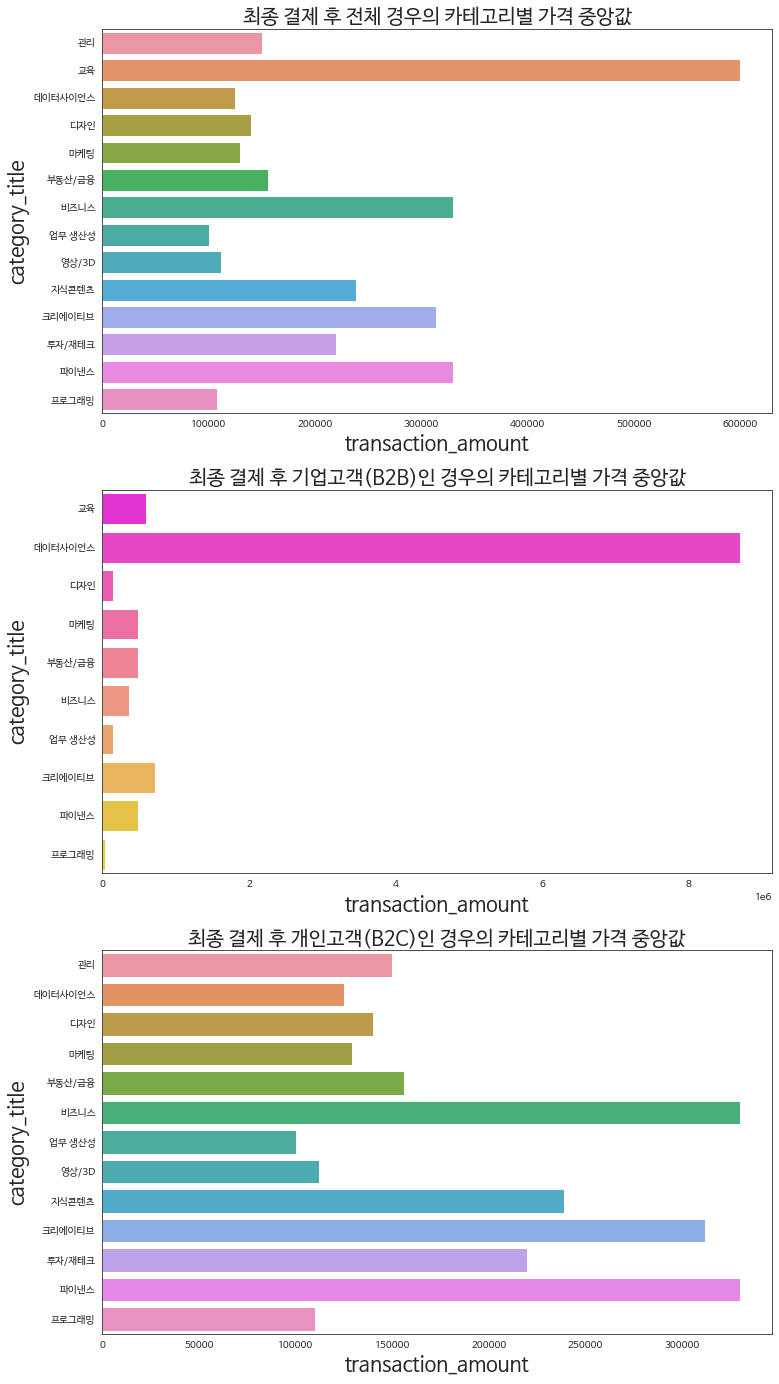

In [ ]:
# 중앙값(median)을 비교해보겠습니다.

plt.figure(figsize=(12,24))

plt.subplot(3,1,1)
sns.barplot(data=df_pay_com2_medi, x='transaction_amount', y=df_pay_com2_medi.index)
plt.title('최종 결제 후 전체 경우의 카테고리별 가격 중앙값', fontsize=20)
plt.xlabel('transaction_amount', fontsize = 20)
plt.ylabel('category_title', fontsize = 20)

plt.subplot(3,1,2)
sns.barplot(data=df_b2b_medi, x='transaction_amount', y=df_b2b_medi.index, palette='spring')
plt.title('최종 결제 후 기업고객(B2B)인 경우의 카테고리별 가격 중앙값', fontsize=20)
plt.xlabel('transaction_amount', fontsize = 20)
plt.ylabel('category_title', fontsize = 20)

plt.subplot(3,1,3)
sns.barplot(data=df_b2c_medi, x='transaction_amount', y=df_b2c_medi.index)
plt.title('최종 결제 후 개인고객(B2C)인 경우의 카테고리별 가격 중앙값', fontsize=20)
plt.xlabel('transaction_amount', fontsize = 20)
plt.ylabel('category_title', fontsize = 20)

plt.show()

최종 결제 내역 중 개인고객(B2C)의 카테고리별 가격에 이상치가 많아서 평균이 아닌 중앙값을 비교했습니다.<br><br>

최종 결제 후 전체경우의 카테고리별 가격 중앙값 <br>
1위 교육<br>
공동 2위 비즈니스, 파이낸스<br>
3위 크리에이티브<br><br>

최종 결제 후 기업고객(B2B)인 경우의 카테고리별 가격 중앙값<br>
1위 데이터사이언스<br>
2위 크리에이티브<br>
3위 교육<br><br>


최종 결제 후 개인고객(B2C)인 경우의 카테고리별 가격 중앙값<br>
공동 1위 비즈니스, 파이낸스 <br>
2위 크리에이티브<br>
3위 지식콘텐츠<br>

환불된 카테고리별 비율 및 가격 평균(or 중앙값)에 대해 알아보자

In [ ]:
df.type_state.value_counts()
# REFUND.COMPLETED 인 경우

PAYMENT.COMPLETED        52902
ORDER.CANCELLED          34123
PAYMENT.CANCELLED         7156
ORDER.COMPLETED           6036
REFUND.COMPLETED          3822
PAYMENT.PENDING           1144
PAYMENT.DELETED            217
PAYMENT.REQUESTED           14
TRANSACTION.COMPLETED        3
REFUND.DELETED               2
Name: type_state, dtype: int64

In [ ]:
df_ref_com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3822 entries, 0 to 3821
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      3822 non-null   int64         
 1   customer_id             3822 non-null   float64       
 2   course_id               3647 non-null   float64       
 3   type                    3822 non-null   object        
 4   state                   3822 non-null   object        
 5   course_title            3822 non-null   object        
 6   category_title          3821 non-null   object        
 7   format                  3822 non-null   object        
 8   completed_at            3822 non-null   datetime64[ns]
 9   transaction_amount      3822 non-null   int64         
 10  coupon_title            0 non-null      object        
 11  coupon_discount_amount  0 non-null      float64       
 12  sale_price              3811 non-null   float64 

카테고리 columns인 경우의 결측치를 전처리 하겠습니다.

In [ ]:
# category_title 결측치 전처리
print('category_title 결측치 수:',df_ref_com.category_title.isna().sum(), '개')

df_ref_com = df_ref_com.dropna(subset=['category_title'])
print('category_title 결측치 수:',df_ref_com.category_title.isna().sum(), '개')

category_title 결측치 수: 1 개
category_title 결측치 수: 0 개


In [ ]:
# 환불인 경우 중 기업고객(B2B)인 경우
df_rc_b2b = df_ref_com.loc[df_ref_com.course_title.str.contains('B2B'), :].reset_index(drop=True)
display(df_rc_b2b.head(2))

# 환불인 경우 중 개인 고객(B2C)인 경우
df_rc_b2c = df_ref_com.loc[~df_ref_com.course_title.str.contains('B2B'), :].reset_index(drop=True)
display(df_rc_b2c.head(2))

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at,type_state
0,985212,453821.0,204017.0,REFUND,COMPLETED,(B2B) 이노비즈협회 경영혁신 마일리지 제도 온라인 구독 (2021년 01월 1차),교육,B2B 온라인,2021-04-07 14:07:00,-130000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaT,REFUND.COMPLETED
1,996816,490107.0,204458.0,REFUND,COMPLETED,(B2B) (주)퍼블리 온라인 구독 패키지 플랜 - 비대면바우처,프로그래밍,B2B 온라인,2021-04-12 18:24:00,-1800000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaT,REFUND.COMPLETED


,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at,type_state
0,972377,444760.0,204122.0,REFUND,COMPLETED,퍼포먼스 마케터 되기 온라인 완주반 2기,마케팅,온라인 완주반,2021-03-29 09:24:43,-147000,NaN,NaN,404000.0,404000.0,NaN,VBANK,NaN,NaT,REFUND.COMPLETED
1,972381,472666.0,203178.0,REFUND,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-29 09:26:13,-96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02,REFUND.COMPLETED


환불한 경우는 payment completed한 후 refund completed 한 경우일 거라고 생각해서 데이터를 살펴보니 payment completed 기록은 없으나 refund completed가 있는 경우를 발견  (해당 경우는 3월 29일 이전에 결제 완료 후 3월 29일 이후에 환불한 것으로 보임)<br>

payment completed 한 경우의 카테고리 비율과 refund completed 한 경우의 카테고리 비율을 비교해보려고 했으나 기록이 없는 경우가 있어서 비교에서 제외하겠습니다.

In [ ]:
# refund completed 기록만 있고 payment completed 기록은 없습니다.
df.loc[df.customer_id == 472666, :]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at,type_state
652,972381,472666.0,203178.0,REFUND,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-29 09:26:13,-96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02,REFUND.COMPLETED


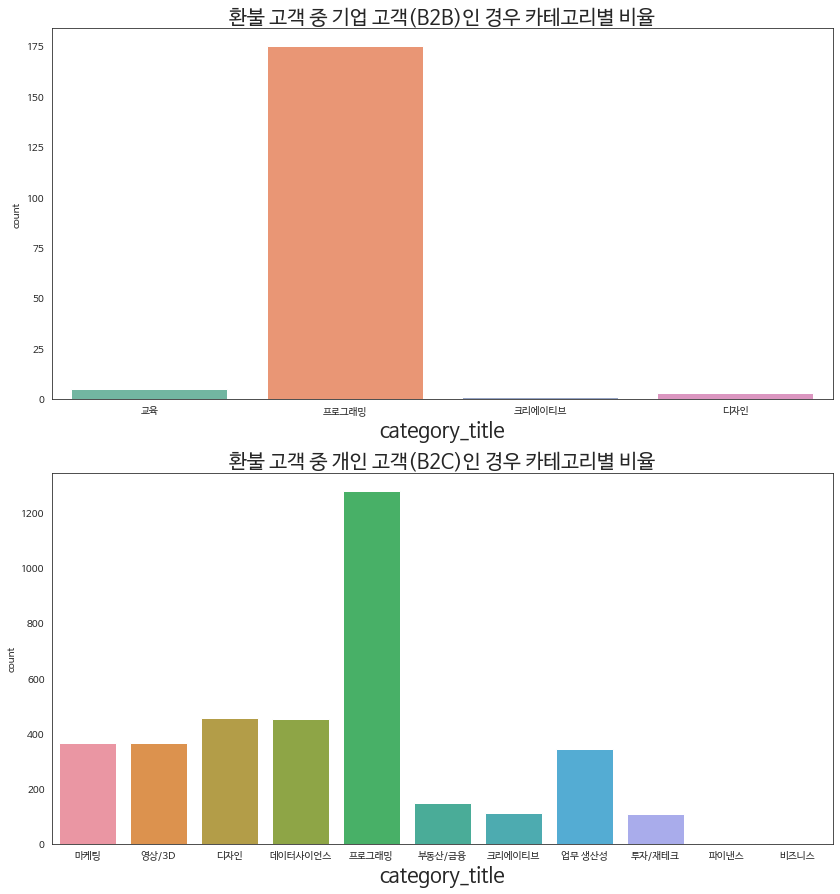

In [ ]:
# 환불된 강의 카테고리별 비율

plt.figure(figsize=(14,15))

plt.subplot(2,1,1)
sns.countplot(data=df_rc_b2b, x='category_title',palette='Set2')
plt.title('환불 고객 중 기업 고객(B2B)인 경우 카테고리별 비율', fontsize=20)
plt.xlabel('category_title', fontsize = 20)

plt.subplot(2,1,2)
sns.countplot(data=df_rc_b2c, x='category_title')
plt.title('환불 고객 중 개인 고객(B2C)인 경우 카테고리별 비율', fontsize=20)
plt.xlabel('category_title', fontsize = 20)

plt.show()

환불 고객 중 기업 고객(B2B)인 경우 카테고리별 비율<br>

1위 프로그래밍<br>
2위 교육<br>
3위 디자인<br><br>

환불 고객 중 개인 고객(B2C)인 경우 카테고리별 비율<br>

1위 프로그래밍<br>
2위 디자인<br>
3위 데이터사이언스<br><br>

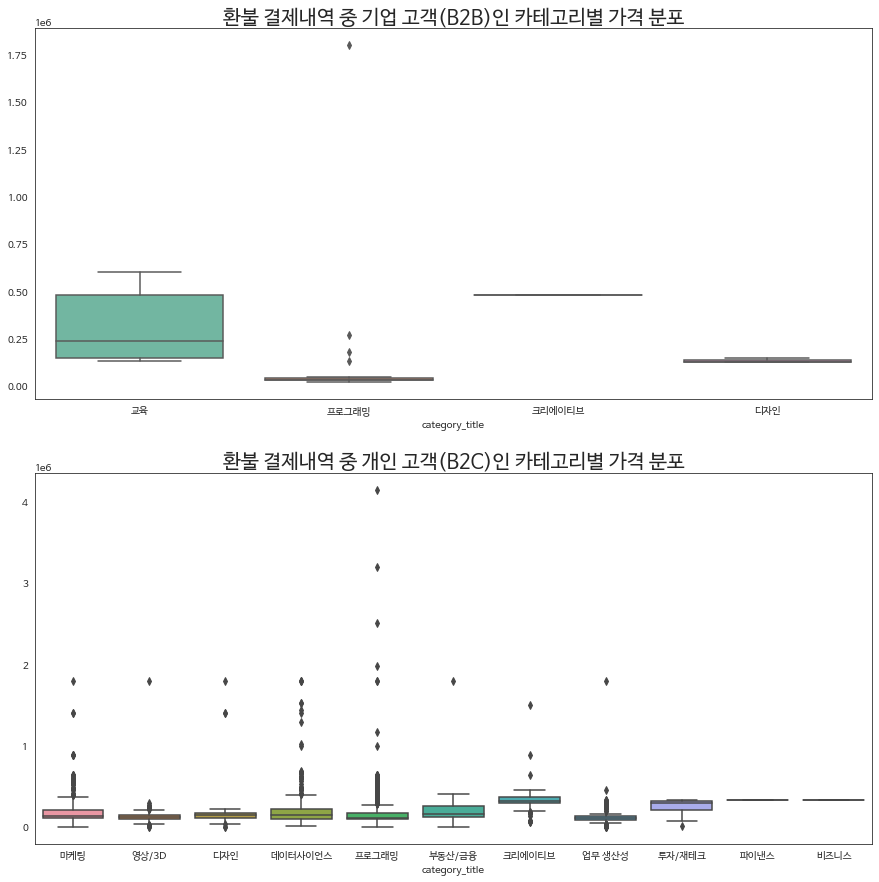

In [ ]:
# 카테고리별 환불 가격 평균을 볼지 중앙값을 볼지 확정하기 위해 우선 이상치부터 확인해보겠습니다.

plt.figure(figsize=(15,15))

plt.subplot(2,1,1)
y=abs(df_rc_b2b.transaction_amount.values)
pd.options.display.float_format='{:.2f}'.format
sns.boxplot(data=df_rc_b2b, x='category_title', y=y, palette='Set2')
plt.title('환불 결제내역 중 기업 고객(B2B)인 카테고리별 가격 분포', fontsize=20)

plt.subplot(2,1,2)
y=abs(df_rc_b2c.transaction_amount.values)
pd.options.display.float_format='{:.2f}'.format
sns.boxplot(data=df_rc_b2c, x='category_title', y=y)
plt.title('환불 결제내역 중 개인 고객(B2C)인 카테고리별 가격 분포', fontsize=20)

plt.show()

# 개인고객(B2C)의 이상치가 많아서 가격 평균이 아닌 중앙값을 비교해보겠습니다.

In [ ]:
print(abs(min(df_rc_b2b.loc[df_rc_b2b.category_title == '프로그래밍', :]['transaction_amount'].values)))
print('기업고객(B2B)의 최대 환불 금액은 카테고리 프로그래밍인 경우의',abs(min(df_rc_b2b.transaction_amount)),'원입니다.')

1800000
기업고객(B2B)의 최대 환불 금액은 카테고리 프로그래밍인 경우의 1800000 원입니다.


In [ ]:
print(abs(min(df_rc_b2c.loc[df_rc_b2c.category_title == '프로그래밍', :]['transaction_amount'].values)))
print('개인고객(B2C)의 최대 환불 금액은 카테고리 프로그래밍인 경우의',abs(min(df_rc_b2c.transaction_amount)),'원입니다.')

4144074
개인고객(B2C)의 최대 환불 금액은 카테고리 프로그래밍인 경우의 4144074 원입니다.


In [ ]:
df_rc_b2b_medi = df_rc_b2b.groupby('category_title').agg({'transaction_amount' : np.median}) # 기업 고객 카테고리별 환불된 가격 중앙값
df_rc_b2c_medi = df_rc_b2c.groupby('category_title').agg({'transaction_amount' : np.median}) # 개인 고객 카테고리별 환불된 가격 중앙값
df_rc_b2b_medi

,transaction_amount
category_title,
교육,-240000.00
디자인,-129000.00
크리에이티브,-480000.00
프로그래밍,-30000.00


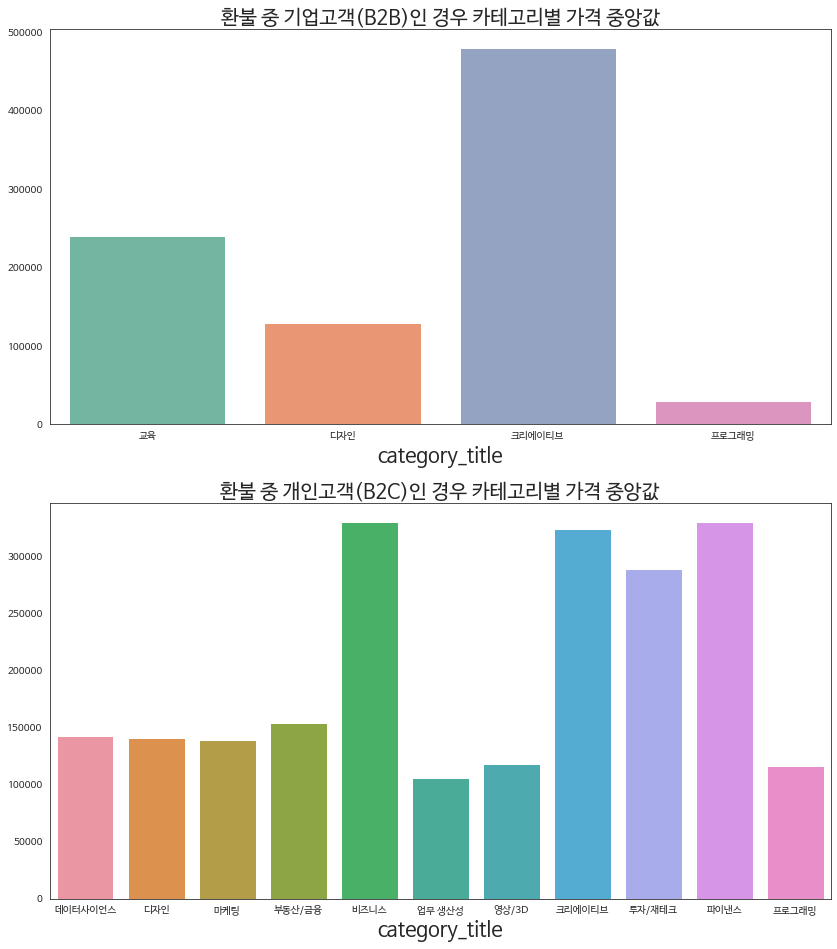

In [ ]:
# 중앙값(median)을 비교해보겠습니다.

plt.figure(figsize=(14,16))

plt.subplot(2,1,1)
y= abs(df_rc_b2b_medi.transaction_amount.values)
sns.barplot(data=df_rc_b2b_medi, x=df_rc_b2b_medi.index, y=y, palette = 'Set2')
plt.title('환불 중 기업고객(B2B)인 경우 카테고리별 가격 중앙값', fontsize=20)
plt.xlabel('category_title', fontsize = 20)

plt.subplot(2,1,2)
y= abs(df_rc_b2c_medi.transaction_amount.values)
sns.barplot(data=df_rc_b2c_medi, x=df_rc_b2c_medi.index, y=y)
plt.title('환불 중 개인고객(B2C)인 경우 카테고리별 가격 중앙값', fontsize=20)
plt.xlabel('category_title', fontsize = 20)

plt.show()

환불 중 개인고객(B2C)의 카테고리별 가격에 이상치가 많아서 평균이 아닌 중앙값을 비교했습니다.<br><br>

환불 중 기업고객(B2B)인 경우 카테고리별 가격 중앙값<br>
1위 크리에이티브<br>
2위 교육<br>
3위 디자인<br><br>

환불 중 개인고객(B2C)인 경우 카테고리별 가격 중앙값<br>
공동 1위 비즈니스, 파이낸스<br>
2위 크리에이티브<br>
3위 투자/재테크 <br><br>




In [ ]:
df_rc_b2c.course_title.value_counts().head(3)

초격차 패키지 : 한 번에 끝내는 프론트엔드 개발               121
초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터    105
초격차 패키지 : 한 번에 끝내는 node.js 웹 프로그래밍         68
Name: course_title, dtype: int64

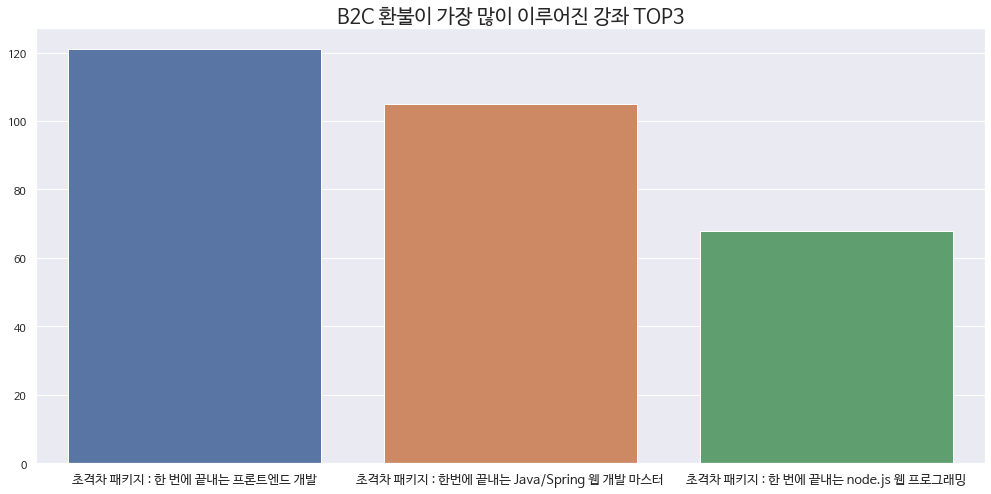

In [ ]:
plt.figure(figsize=(17,8))
sns.barplot(data=df_rc_b2c, x=df_rc_b2c.course_title.value_counts().head(3).index, y=df_rc_b2c.course_title.value_counts().head(3).values)
plt.xticks(fontsize=13)
plt.title('B2C 환불이 가장 많이 이루어진 강좌 TOP3', fontsize=20)
plt.show()

In [ ]:
df_ref_com.groupby('course_title')['transaction_amount'].sum().sort_values(ascending=False).tail(3)

course_title
초격차 패키지 : 한 번에 끝내는 프론트엔드 개발                     -13090905
올인원 패키지 : 박세익 전무에게 배우는 주식 시장 분석 & 포트폴리오 운용 전략   -14382477
매주)디지털 마케팅 온라인 완주반                              -21075931
Name: transaction_amount, dtype: int64

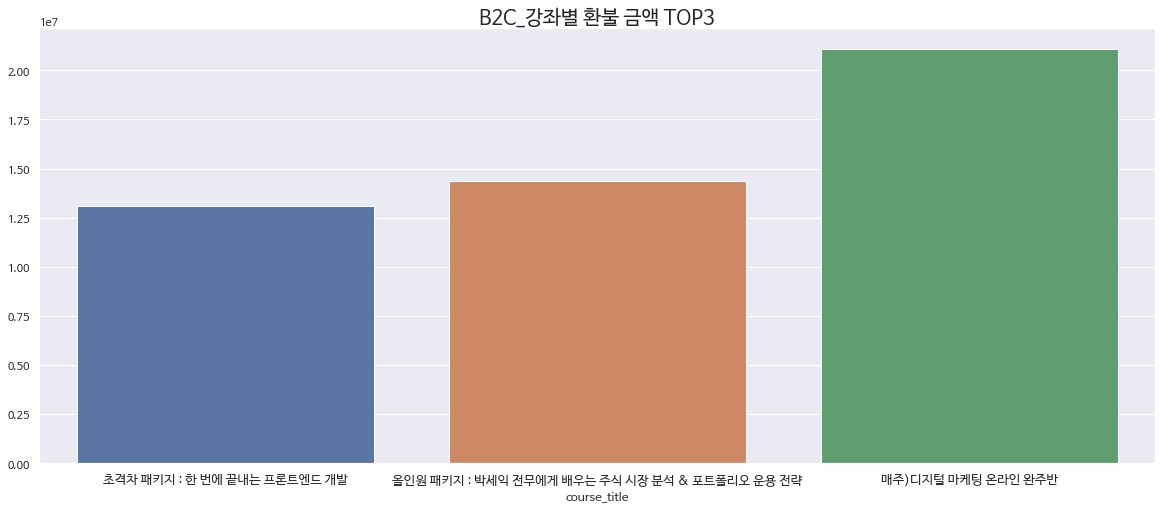

In [ ]:
plt.figure(figsize=(20, 8))
df_rc_b2c['count'] = 1 
x = df_rc_b2c.groupby('course_title')["transaction_amount"].sum().sort_values(ascending=False).tail(3).index
y = sorted(abs(df_rc_b2c.groupby('course_title')['transaction_amount'].sum()))[-3:]
sns.barplot(x=x, y=y,data=df_rc_b2c)
plt.title('B2C_강좌별 환불 금액 TOP3', fontsize = 20)
plt.xticks(fontsize=13)
plt.show()

구매 금액(payment-completed) - 환불 금액(refund-completed)하여 

카테고리별 전체, 기업고객(B2B), 개인고객(B2C)별 매출을 알아보자

In [ ]:
print('2021.03.29~2021.09.26의 전체 매출액은 ',df_ref_com.transaction_amount.sum() + df.loc[df.type_state == 'PAYMENT.COMPLETED',:]['transaction_amount'].sum(), '원입니다.')

2021.03.29~2021.09.26의 전체 매출액은  8012732457 원입니다.


In [ ]:
# 카테고리별 환불 금액 총합
a = df_ref_com.groupby('category_title').agg({'transaction_amount':np.sum})

# 카테고리별 구매 금액 총합
b = df_pay_com2.groupby('category_title').agg({'transaction_amount':np.sum})

display(a)
display(b)

,transaction_amount
category_title,
교육,-1600000
데이터사이언스,-93439153
디자인,-66463452
마케팅,-75983126
부동산/금융,-28484791
비즈니스,-660000
업무 생산성,-41798875
영상/3D,-46737195
크리에이티브,-37372473


,transaction_amount
category_title,
관리,150000
교육,1161925545
데이터사이언스,1614341252
디자인,729661620
마케팅,810588950
부동산/금융,504129225
비즈니스,6049865
업무 생산성,636828300
영상/3D,591443400


In [ ]:
# 환불 금액, 구매 금액 하나의 데이터프레임으로 생성
df_revenue = pd.merge(a,b, how='outer', on='category_title')

# 금액을 합쳐서 카테고리별 매출을 구하기 위해 결측치는 0으로 변환
df_revenue = df_revenue.fillna(0)

# 카테고리별 환불 금액과 구매 금액을 합친 매출 금액 columns을 생성
df_revenue['cate_profit'] = df_revenue.transaction_amount_x + df_revenue.transaction_amount_y 
df_revenue

,transaction_amount_x,transaction_amount_y,cate_profit
category_title,,,
교육,-1600000.00,1161925545,1160325545.00
데이터사이언스,-93439153.00,1614341252,1520902099.00
디자인,-66463452.00,729661620,663198168.00
마케팅,-75983126.00,810588950,734605824.00
부동산/금융,-28484791.00,504129225,475644434.00
비즈니스,-660000.00,6049865,5389865.00
업무 생산성,-41798875.00,636828300,595029425.00
영상/3D,-46737195.00,591443400,544706205.00
크리에이티브,-37372473.00,338428300,301055827.00


In [ ]:
df_revenue

In [ ]:
# 기업고객(B2B)의 카테고리별 매출 파악

# 기업고객(B2B)인 경우의 전체 매출액
print('2021.03.29~2021.09.26의 기업고객(B2B)인 경우 총매출액은 ',df_rc_b2b.transaction_amount.sum() + df_pc_b2b.transaction_amount.sum(), '원입니다.')

2021.03.29~2021.09.26의 기업고객(B2B)인 경우 총매출액은  2016039909 원입니다.


In [ ]:
# 기업고객(B2B)의 카테고리별 매출 파악
c = df_rc_b2b.groupby('category_title').agg({'transaction_amount':np.sum})

d = df_pc_b2b.groupby('category_title').agg({'transaction_amount':np.sum})

display(c)
display(d)

,transaction_amount
category_title,
교육,-1600000
디자인,-407000
크리에이티브,-480000
프로그래밍,-7929990


,transaction_amount
category_title,
교육,1161925545
데이터사이언스,541879554
디자인,3269800
마케팅,146982500
부동산/금융,2177500
비즈니스,360000
업무 생산성,25265200
크리에이티브,63553500
파이낸스,480000


In [ ]:
# 환불 금액, 구매 금액 하나의 데이터프레임으로 생성
df_b2b_revenue = pd.merge(c,d , how='outer', on='category_title')

# 금액을 합쳐서 카테고리별 매출을 구하기 위해 결측치는 0으로 변환
df_b2b_revenue = df_b2b_revenue.fillna(0)

# 카테고리별 환불 금액과 구매 금액을 합친 매출 금액 columns을 생성
df_b2b_revenue['cate_profit'] = df_b2b_revenue.transaction_amount_x + df_b2b_revenue.transaction_amount_y 
df_b2b_revenue

,transaction_amount_x,transaction_amount_y,cate_profit
category_title,,,
교육,-1600000.00,1161925545,1160325545.00
디자인,-407000.00,3269800,2862800.00
크리에이티브,-480000.00,63553500,63073500.00
프로그래밍,-7929990.00,80563300,72633310.00
데이터사이언스,0.00,541879554,541879554.00
마케팅,0.00,146982500,146982500.00
부동산/금융,0.00,2177500,2177500.00
비즈니스,0.00,360000,360000.00
업무 생산성,0.00,25265200,25265200.00


In [ ]:
# 개인고객(B2C)의 카테고리별 매출 파악

# 개인고객(B2C)인 경우의 전체 매출액
print('2021.03.29~2021.09.26의 개인고객(B2C)인 경우 총매출액은 ',df_rc_b2c.transaction_amount.sum() + df_pc_b2c.transaction_amount.sum(), '원입니다.')

2021.03.29~2021.09.26의 개인고객(B2C)인 경우 총매출액은  5984212548 원입니다.


In [ ]:
# 개인고객(B2C)의 카테고리별 매출 파악
e = df_rc_b2c.groupby('category_title').agg({'transaction_amount':np.sum})

f = df_pc_b2c.groupby('category_title').agg({'transaction_amount':np.sum})

display(e)
display(f)

,transaction_amount
category_title,
데이터사이언스,-93439153
디자인,-66056452
마케팅,-75983126
부동산/금융,-28484791
비즈니스,-660000
업무 생산성,-41798875
영상/3D,-46737195
크리에이티브,-36892473
투자/재테크,-26842980


,transaction_amount
category_title,
관리,150000
데이터사이언스,1072461698
디자인,726391820
마케팅,663606450
부동산/금융,501951725
비즈니스,5689865
업무 생산성,611563100
영상/3D,591443400
지식콘텐츠,4970000


In [ ]:
# 환불 금액, 구매 금액 하나의 데이터프레임으로 생성
df_b2c_revenue = pd.merge(e,f , how='outer', on='category_title')

# 금액을 합쳐서 카테고리별 매출을 구하기 위해 결측치는 0으로 변환
df_b2c_revenue = df_b2c_revenue.fillna(0)

# 카테고리별 환불 금액과 구매 금액을 합친 매출 금액 columns을 생성
df_b2c_revenue['cate_profit'] = df_b2c_revenue.transaction_amount_x + df_b2c_revenue.transaction_amount_y 
df_b2c_revenue

,transaction_amount_x,transaction_amount_y,cate_profit
category_title,,,
데이터사이언스,-93439153.00,1072461698,979022545.00
디자인,-66056452.00,726391820,660335368.00
마케팅,-75983126.00,663606450,587623324.00
부동산/금융,-28484791.00,501951725,473466934.00
비즈니스,-660000.00,5689865,5029865.00
업무 생산성,-41798875.00,611563100,569764225.00
영상/3D,-46737195.00,591443400,544706205.00
크리에이티브,-36892473.00,274874800,237982327.00
투자/재테크,-26842980.00,304549400,277706420.00


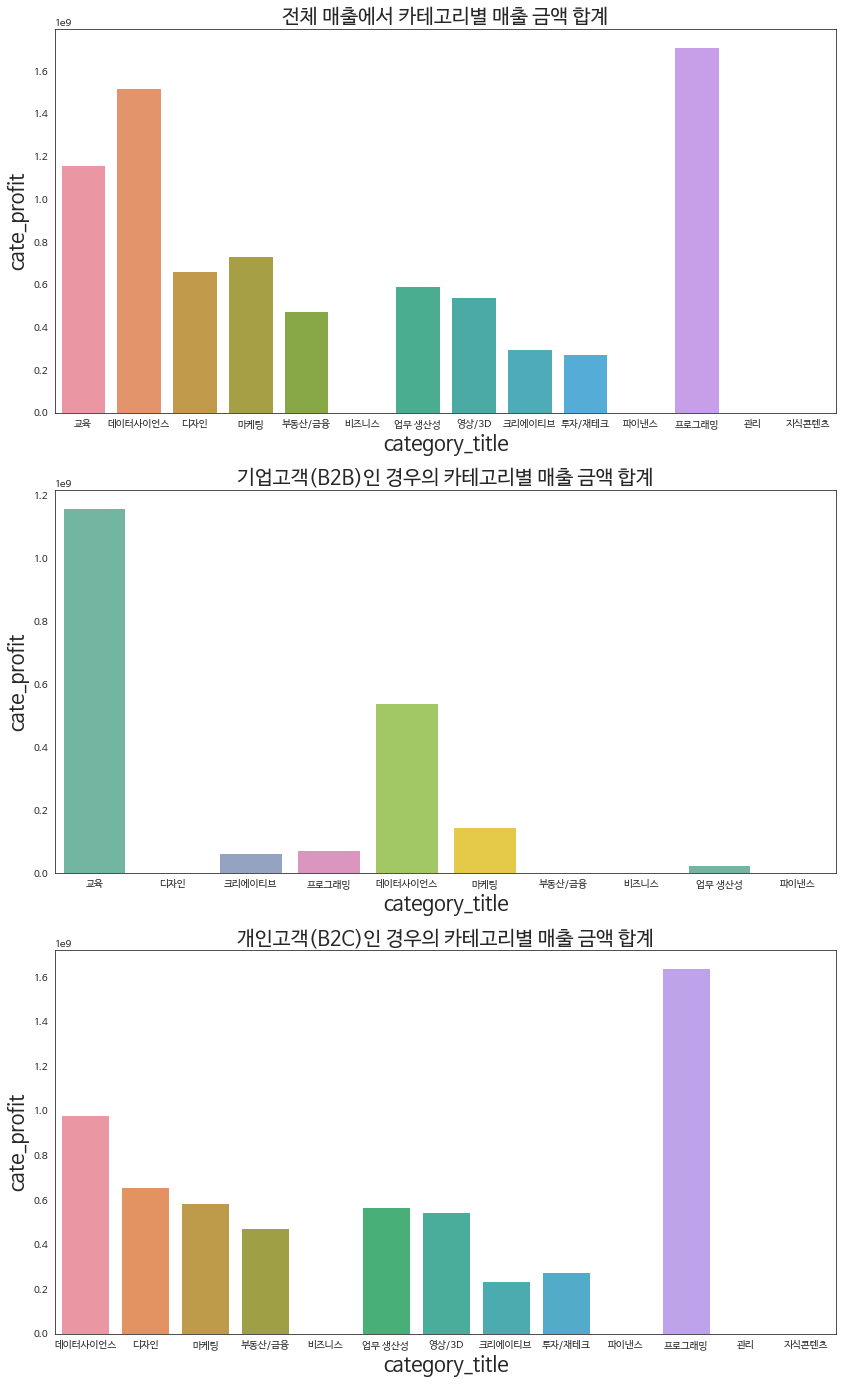

In [ ]:
# 전체, B2B, B2C의 카테고리별 매출 금액 합계

plt.figure(figsize=(14,24))

plt.subplot(3,1,1)
sns.barplot(data=df_revenue, x=df_revenue.index, y='cate_profit')
plt.title('전체 매출에서 카테고리별 매출 금액 합계', fontsize=20)
plt.xlabel('category_title', fontsize = 20)
plt.ylabel('cate_profit', fontsize = 20)

plt.subplot(3,1,2)
sns.barplot(data=df_b2b_revenue, x=df_b2b_revenue.index, y='cate_profit', palette = 'Set2')
plt.title('기업고객(B2B)인 경우의 카테고리별 매출 금액 합계', fontsize=20)
plt.xlabel('category_title', fontsize = 20)
plt.ylabel('cate_profit', fontsize = 20)

plt.subplot(3,1,3)
sns.barplot(data=df_b2c_revenue, x=df_b2c_revenue.index, y='cate_profit')
plt.title('개인고객(B2C)인 경우의 카테고리별 매출 금액 합계', fontsize=20)
plt.xlabel('category_title', fontsize = 20)
plt.ylabel('cate_profit', fontsize = 20)

plt.show()

전체 매출에서 카테고리별 매출 금액 합계 <br>
1위 프로그래밍<br>
2위 데이터사이언스<br>
3위 교육<br><br>

카테고리별 기업고객(B2B)인 경우의 매출 금액 합계<br>
1위 교육<br>
2위 데이터사이언스<br>
3위 마케팅<br><br>


카테고리별 개인고객(B2C)인 경우의 매출 금액 합계<br>
1위 프로그래밍<br>
2위 데이터사이언스<br>
3위 디자인<br>

### 마케팅 시작(marketing_start_at, completed_at)에 따라 기간별, 카테고리별 매출에 대해 전체, B2B, B2C를 나누어 확인해보자.
- 마케팅 판매가 시작된 날짜, 결제가 완료된 날짜를 비교하여 마케팅의 효과에 대해 알아보자 

전체 최종 결제 중 마케팅 시작에 따른 카테고리별 판매 금액(매출) 합계에 대해 데이터 분석을 해보겠습니다.

In [ ]:
df_pay_com2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52899 entries, 0 to 52901
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      52899 non-null  int64         
 1   customer_id             52899 non-null  float64       
 2   course_id               50922 non-null  float64       
 3   type                    52899 non-null  object        
 4   state                   52899 non-null  object        
 5   course_title            52899 non-null  object        
 6   category_title          52899 non-null  object        
 7   format                  52899 non-null  object        
 8   completed_at            52899 non-null  datetime64[ns]
 9   transaction_amount      52899 non-null  int64         
 10  coupon_title            23761 non-null  object        
 11  coupon_discount_amount  23761 non-null  float64       
 12  sale_price              51831 non-null  float6

In [ ]:
# 최종 결제 고객 중 
print('marketing_start_at의 결측치 수 :',df_pay_com2.marketing_start_at.isna().sum(), '개')
print('completed_at의 결측치 수 :', df_pay_com2.completed_at.isna().sum(), '개')
print('')
# marketing_start_at 전처리 -> 가장 처음 마케팅 시작한 날짜를 결측치에 대입
display(df_pay_com2.marketing_start_at.describe())
df_pay_com2.loc[df_pay_com2.marketing_start_at.isna(), 'marketing_start_at'] = df_pay_com2.marketing_start_at.min()
# 전처리 확인
print('marketing_start_at의 결측치 수 :',df_pay_com2.marketing_start_at.isna().sum(), '개')

marketing_start_at의 결측치 수 : 9341 개
completed_at의 결측치 수 : 0 개



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


count                   43558
unique                    172
top       2021-02-02 00:00:00
freq                     1444
first     2019-02-19 00:00:00
last      2021-09-16 00:00:00
Name: marketing_start_at, dtype: object

marketing_start_at의 결측치 수 : 0 개


In [ ]:
# 이상치 확인
print('마케팅 시작 날짜가 최종 결제 날짜보다 뒤인 경우', sum(df_pay_com2.marketing_start_at > df_pay_com2.completed_at), '개')
# 확인해보니 12시간 차이 나지 않는 내용들. marketing_start_at = completed_at 처리
df_pay_com2.loc[df_pay_com2.marketing_start_at > df_pay_com2.completed_at, 'marketing_start_at'] = df_pay_com2.completed_at
# 이상치 처리 확인
print('마케팅 시작 날짜가 최종 결제 날짜보다 뒤인 경우', sum(df_pay_com2.marketing_start_at > df_pay_com2.completed_at), '개')

마케팅 시작 날짜가 최종 결제 날짜보다 뒤인 경우 8 개
마케팅 시작 날짜가 최종 결제 날짜보다 뒤인 경우 0 개


In [ ]:
# 마케팅 시작 날짜, 최종 결제일까지 날짜 month로 계산하여 분류화 -> marketing_effect_month 컬럼 추가
df_pay_com2['marketing_effect_month'] = (df_pay_com2.completed_at - df_pay_com2.marketing_start_at).dt.days / 30
def func(x) : 
    if 0 <= x < 7 :
        return '~6month'
    elif 7 <= x < 13 :
        return '~12month'
    elif 13 <= x < 19 :
        return '~18month'
    elif 19 <= x < 25 :
        return '~24month'
    elif 25 <= x < 31 :
        return '~30month'
    elif 31 <= x < 37 :
        return '~36month'
    else :
        return 'Not_related'
df_pay_com2['marketing_term_effect'] = df_pay_com2.marketing_effect_month.map(func)
df_pay_com2.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,...,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at,type_state,marketing_effect_month,marketing_term_effect
0,970657,72297.00,204246.00,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,...,19090.00,190900.00,190900.00,NaN,CARD,NaN,2021-03-04,PAYMENT.COMPLETED,0.80,~6month
1,970658,478028.00,201797.00,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,...,20000.00,117500.00,117500.00,NaN,CARD,PPT/보고서,2019-11-14,PAYMENT.COMPLETED,16.67,~18month
2,970669,478033.00,203178.00,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,...,20000.00,116000.00,116000.00,NaN,CARD,영상 편집,2020-12-02,PAYMENT.COMPLETED,3.87,~6month
3,970671,469860.00,203644.00,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,...,NaN,263000.00,263000.00,NaN,CARD,NaN,2020-11-27,PAYMENT.COMPLETED,4.03,~6month
4,970676,478035.00,203720.00,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,...,20000.00,111000.00,111000.00,NaN,CARD,프론트엔드 개발,2021-02-02,PAYMENT.COMPLETED,1.80,~6month


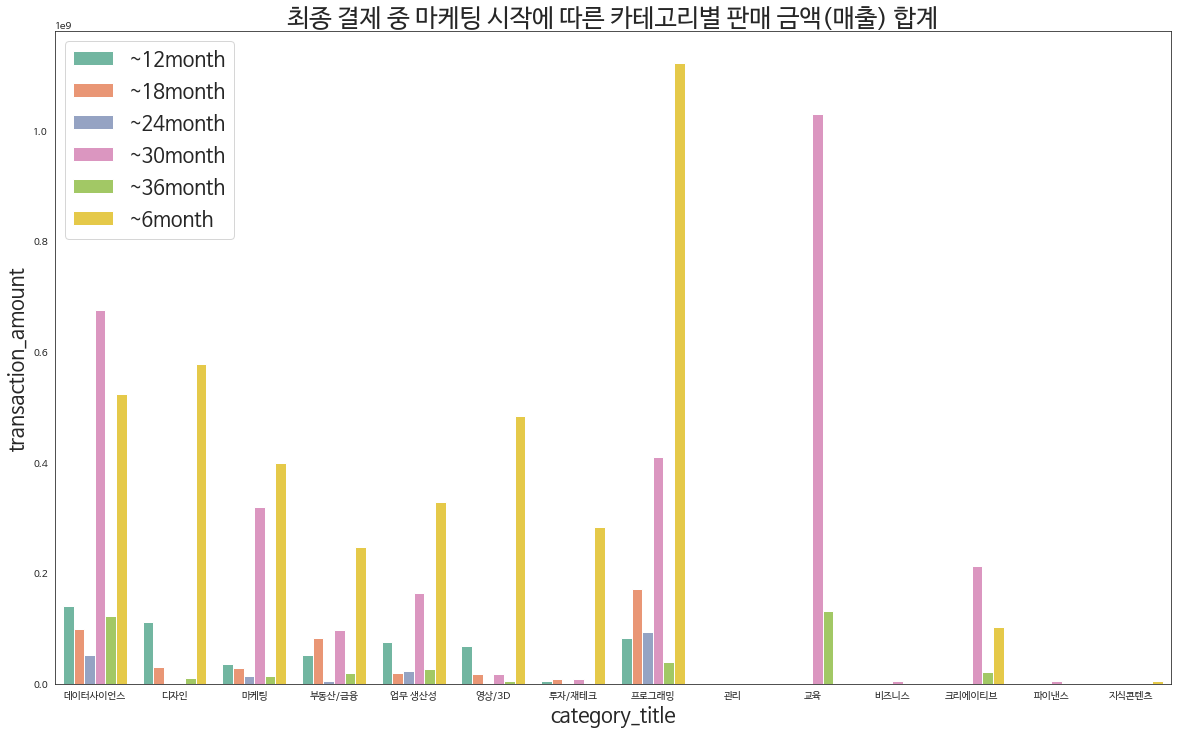

In [ ]:
# 구매 확정 중 마케팅 시작에 따른 카테고리별 판매 금액(매출) 합계 (환불 고려 X)
a = df_pay_com2.groupby(['marketing_term_effect', 'category_title']).agg({'transaction_amount' : np.sum})
a = a.reset_index() # 피벗테이블 데이터프레임화하여 시각화

plt.figure(figsize=(20,12))
sns.barplot(data=a, x = a.category_title, y = a.transaction_amount, hue = 'marketing_term_effect', palette = 'Set2')
plt.title('최종 결제 중 마케팅 시작에 따른 카테고리별 판매 금액(매출) 합계', fontsize = 25)
plt.xlabel('category_title', fontsize = 20)
plt.ylabel('transaction_amount', fontsize = 20)
plt.legend(fontsize=20)
plt.show()

대부분 판매가 시작된지 6개월 이내의 카테고리를 선택하여 듣는 것으로 확인했습니다.

따라서 카테고리별로 6개월 이내에 새로운 강좌를 생성하여 판매하는 것이 마케팅에 도움이 될 것으로 추측할 수 있습니다.

기업고객(B2B) 최종 결제 중 마케팅 시작에 따른 카테고리별 판매 금액(매출) 합계에 대해 데이터 분석을 해보겠습니다.

In [ ]:
# 기업고객(B2B)의 marketing_start_at 결측치 수가 매우많아, 분석에 적합하지 않습니다. 개인고객(B2C)에 대한 마케팅 시작에 따른 카테고리별 판매 금액(매출) 합계 (환불 고려 X)를 알아보겠습니다.
display(df_pc_b2b.info())
print('기업고객(B2B)의 marketing_start_at 결측치 수 :', df_pc_b2b.marketing_start_at.isna().sum(), '개')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      1752 non-null   int64         
 1   customer_id             1752 non-null   float64       
 2   course_id               1752 non-null   float64       
 3   type                    1752 non-null   object        
 4   state                   1752 non-null   object        
 5   course_title            1752 non-null   object        
 6   category_title          1752 non-null   object        
 7   format                  1752 non-null   object        
 8   completed_at            1752 non-null   datetime64[ns]
 9   transaction_amount      1752 non-null   int64         
 10  coupon_title            48 non-null     object        
 11  coupon_discount_amount  48 non-null     float64       
 12  sale_price              786 non-null    float64 

None

기업고객(B2B)의 marketing_start_at 결측치 수 : 1704 개


개인고객(B2C) 최종 결제 중 마케팅 시작에 따른 카테고리별 판매 금액(매출) 합계에 대해 데이터 분석을 해보겠습니다.

In [ ]:
# 개인고객(B2C)의 marketing_start_at 결측치 수 확인
display(df_pc_b2c.info())
print('개인고객(B2C)의 marketing_start_at 결측치 수 :', df_pc_b2c.marketing_start_at.isna().sum(), '개')
# marketing_start_at 전처리 -> 가장 처음 마케팅 시작한 날짜를 결측치에 대입
display(df_pc_b2c.marketing_start_at.describe())
df_pc_b2c.loc[df_pc_b2c.marketing_start_at.isna(), 'marketing_start_at'] = df_pc_b2c.marketing_start_at.min()
# 전처리 확인
print('marketing_start_at의 결측치 수 :',df_pc_b2c.marketing_start_at.isna().sum(), '개')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51147 entries, 0 to 51146
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      51147 non-null  int64         
 1   customer_id             51147 non-null  float64       
 2   course_id               49170 non-null  float64       
 3   type                    51147 non-null  object        
 4   state                   51147 non-null  object        
 5   course_title            51147 non-null  object        
 6   category_title          51147 non-null  object        
 7   format                  51147 non-null  object        
 8   completed_at            51147 non-null  datetime64[ns]
 9   transaction_amount      51147 non-null  int64         
 10  coupon_title            23713 non-null  object        
 11  coupon_discount_amount  23713 non-null  float64       
 12  sale_price              51045 non-null  float6

None

개인고객(B2C)의 marketing_start_at 결측치 수 : 7637 개


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """


count                   43510
unique                    171
top       2021-02-02 00:00:00
freq                     1444
first     2019-02-19 00:00:00
last      2021-09-16 00:00:00
Name: marketing_start_at, dtype: object

marketing_start_at의 결측치 수 : 0 개


In [ ]:
# 이상치 확인
print('마케팅 시작 날짜가 최종 결제 날짜보다 뒤인 경우', sum(df_pc_b2c.marketing_start_at > df_pc_b2c.completed_at), '개')
# 확인해보니 12시간 차이 나지 않는 내용들. marketing_start_at = completed_at 처리
df_pc_b2c.loc[df_pc_b2c.marketing_start_at > df_pc_b2c.completed_at, 'marketing_start_at'] = df_pc_b2c.completed_at
# 이상치 처리 확인
print('마케팅 시작 날짜가 최종 결제 날짜보다 뒤인 경우', sum(df_pc_b2c.marketing_start_at > df_pc_b2c.completed_at), '개')

마케팅 시작 날짜가 최종 결제 날짜보다 뒤인 경우 8 개
마케팅 시작 날짜가 최종 결제 날짜보다 뒤인 경우 0 개


In [ ]:
# 마케팅 시작 날짜, 최종 결제일까지 날짜 month로 계산하여 분류화 -> marketing_effect_month 컬럼 추가
df_pc_b2c['marketing_effect_month'] = (df_pc_b2c.completed_at - df_pc_b2c.marketing_start_at).dt.days / 30

df_pc_b2c['marketing_term_effect'] = df_pc_b2c.marketing_effect_month.map(func)
df_pc_b2c.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,...,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at,type_state,marketing_effect_month,marketing_term_effect
0,970657,72297.00,204246.00,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,...,19090.00,190900.00,190900.00,NaN,CARD,NaN,2021-03-04,PAYMENT.COMPLETED,0.80,~6month
1,970658,478028.00,201797.00,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,...,20000.00,117500.00,117500.00,NaN,CARD,PPT/보고서,2019-11-14,PAYMENT.COMPLETED,16.67,~18month
2,970669,478033.00,203178.00,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,...,20000.00,116000.00,116000.00,NaN,CARD,영상 편집,2020-12-02,PAYMENT.COMPLETED,3.87,~6month
3,970671,469860.00,203644.00,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,...,NaN,263000.00,263000.00,NaN,CARD,NaN,2020-11-27,PAYMENT.COMPLETED,4.03,~6month
4,970676,478035.00,203720.00,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,...,20000.00,111000.00,111000.00,NaN,CARD,프론트엔드 개발,2021-02-02,PAYMENT.COMPLETED,1.80,~6month


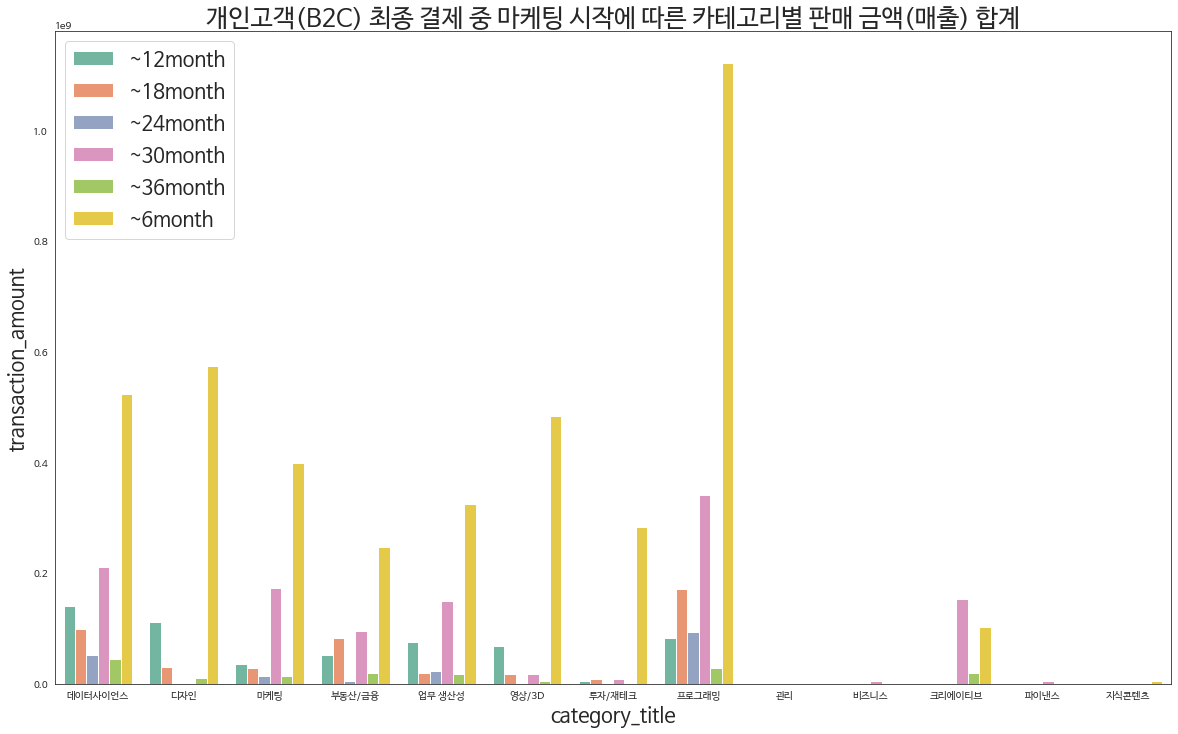

In [ ]:
# 개인고객(B2C) 구매 확정 중 마케팅 시작에 따른 카테고리별 판매 금액(매출) 합계 (환불 고려 X) 
b = df_pc_b2c.groupby(['marketing_term_effect', 'category_title']).agg({'transaction_amount' : np.sum})
b = b.reset_index() # 피벗테이블 데이터프레임화하여 시각화

plt.figure(figsize=(20,12))
sns.barplot(data=b, x = b.category_title, y = b.transaction_amount, hue = 'marketing_term_effect', palette = 'Set2')
plt.title('개인고객(B2C) 최종 결제 중 마케팅 시작에 따른 카테고리별 판매 금액(매출) 합계', fontsize = 25)
plt.xlabel('category_title', fontsize = 20)
plt.ylabel('transaction_amount', fontsize = 20)
plt.legend(fontsize=20)
plt.show()

개인고객(B2C)의 경우 대부분 판매가 시작된지 6개월 이내의 카테고리를 선택하여 듣는 것으로 확인했습니다.<br>

따라서 개인고객(B2C)에 따른 마케팅 방향은 카테고리별로 6개월 이내에 새로운 강좌를 생성하여 판매하는 것이 도움이 될 것으로 추측할 수 있습니다.<br><br>

특히, 디자인, 영상/3D, 투자/재테크는 판매 시작 이후 6개월 이내의 매출이 대부분을 차지합니다.<br> 디자인, 영상/3D, 투자/재테크 분야는 트렌드에 영향을 많이 받는 분야이므로 해당 카테고리에 대해서는 강의를 자주 생성하는 편이 매출 향상에 도움이 된다고 할 수 있습니다.

### 선호도, 가격 평균(or 중앙값), 매출을 통해 카테고리에 따른 B2B, B2C별 마케팅 방향성 제시